In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sb

In [2]:
current_path = Path.cwd()
base = current_path / Path("A/results/support_images_summary.csv")
dfA = pd.read_csv(base)


## Chart for Image Index vs Initial Dice with 25-75 IQR

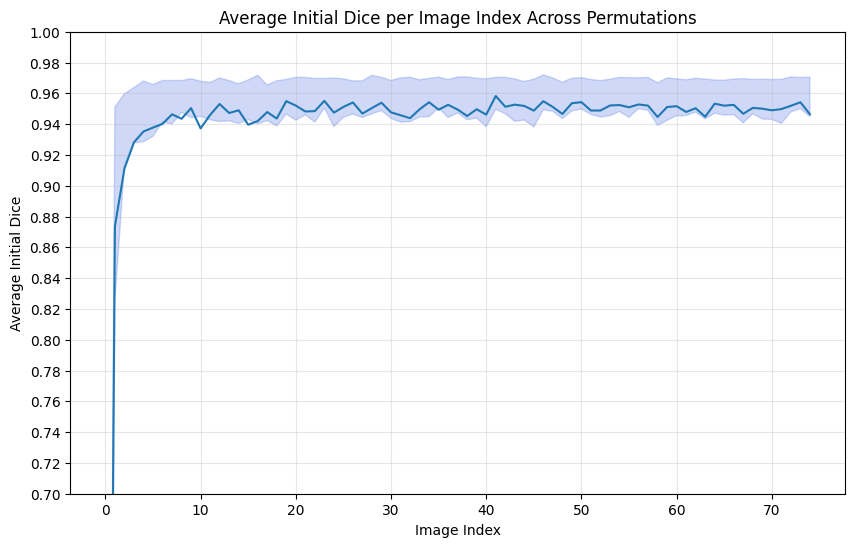

In [3]:
image_index_groups = dfA.groupby("image_index")["initial_dice"]
stats = image_index_groups.aggregate(mean_dice=lambda s: s.mean(), q1=lambda s: s.quantile(0.25),
        q3=lambda s: s.quantile(0.75), mini=lambda s: s.min(), maxi=lambda s: s.max())

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    stats.index,
    stats["mean_dice"],
    label=f"Average Initial Dice per Image Index Across Permutations"
)
ax.fill_between(
    stats.index,
    stats["q1"],
    stats["q3"],
    color="royalblue",
    alpha=0.25,
    label="IQR"
)

ax.set_title(f"Average Initial Dice per Image Index Across Permutations")
ax.set_xlabel("Image Index")
ax.set_ylabel("Average Initial Dice")
ax.grid(alpha=0.3)
ax.set_ylim(0.85, 1.0)
ax.set_yticks(np.arange(0.70, 1.01, 0.02))
fig.show()
# from scipy.stats import skew
# dfA.groupby("image_index")["initial_dice"].apply(skew).describe()


## Stats Outline

In [4]:
print(stats)
stats.to_csv(current_path / "A/results/stats_summary.csv")

                mean_dice            q1            q3          mini  \
image_index                                                           
0            5.495561e-12  4.568296e-12  6.411503e-12  2.355712e-12   
1            8.735986e-01  8.250947e-01  9.511662e-01  5.029854e-01   
2            9.110661e-01  9.134337e-01  9.596297e-01  3.300895e-01   
3            9.281601e-01  9.278402e-01  9.637411e-01  5.712023e-01   
4            9.352081e-01  9.286246e-01  9.680334e-01  6.386244e-01   
...                   ...           ...           ...           ...   
70           9.489546e-01  9.430547e-01  9.689675e-01  7.976168e-01   
71           9.497739e-01  9.405261e-01  9.690475e-01  7.918344e-01   
72           9.519137e-01  9.479108e-01  9.706620e-01  7.954946e-01   
73           9.541975e-01  9.501380e-01  9.702647e-01  8.079349e-01   
74           9.463991e-01  9.448117e-01  9.704766e-01  7.757251e-01   

                     maxi  
image_index                
0            9.61537

## Chart for Image Index vs Initial Dice with min-max range

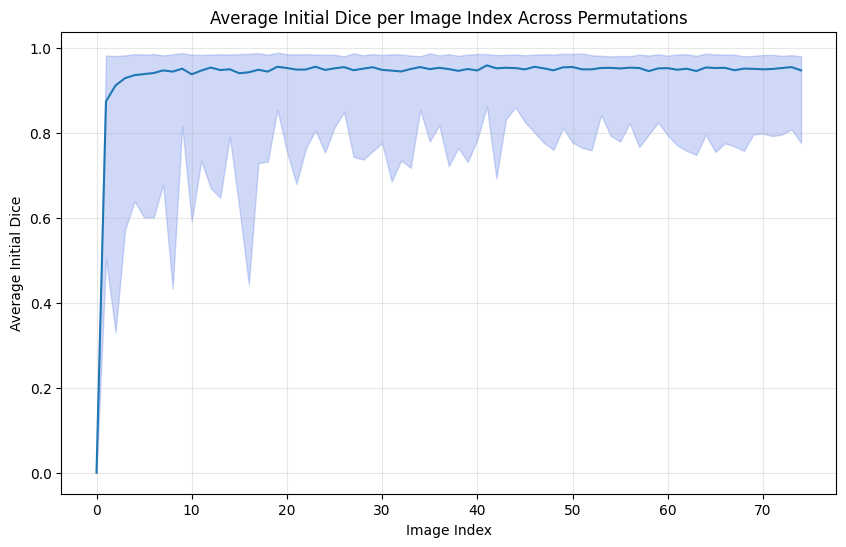

In [5]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    stats.index,
    stats["mean_dice"],
    label=f"Average Initial Dice per Image Index Across Permutations"
)
ax.fill_between(
    stats.index,
    stats["mini"],
    stats["maxi"],
    color="royalblue",
    alpha=0.25,
    label="Min-Max Range"
)

ax.set_title(f"Average Initial Dice per Image Index Across Permutations")
ax.set_xlabel("Image Index")
ax.set_ylabel("Average Initial Dice")
ax.grid(alpha=0.3)
# ax.set_xlim(1,53)
# ax.set_yticks(np.arange(0.70, 1.01, 0.02))
fig.show()

# Average initial dice for each permutation

                   initial_dice
permutation_index              
0                      0.937470
1                      0.934175
2                      0.932530
3                      0.937038
4                      0.935103
...                         ...
95                     0.939559
96                     0.934833
97                     0.934053
98                     0.934204
99                     0.936522

[100 rows x 1 columns]


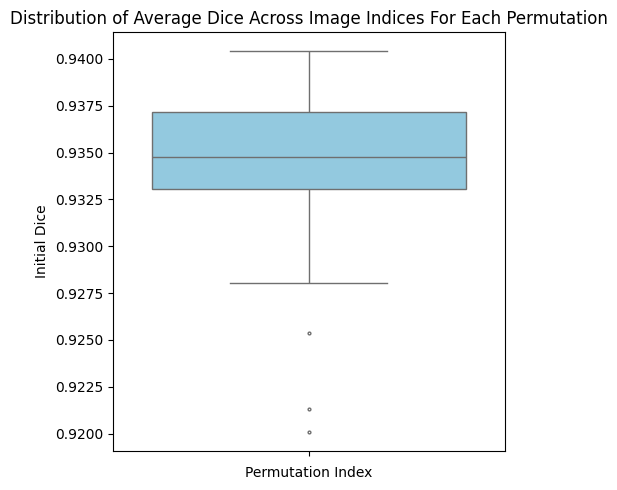

In [6]:
groups = dfA.groupby("permutation_index")["initial_dice"].mean().sort_index().to_frame()
print(groups)
plt.figure(figsize=(5, 5))
sb.boxplot(
    data=groups,
    y="initial_dice",
    color="skyblue",
    fliersize=2,  # show outliers as small dots
)
plt.title("Distribution of Average Dice Across Image Indices For Each Permutation")
plt.xlabel("Permutation Index")
plt.ylabel("Initial Dice")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


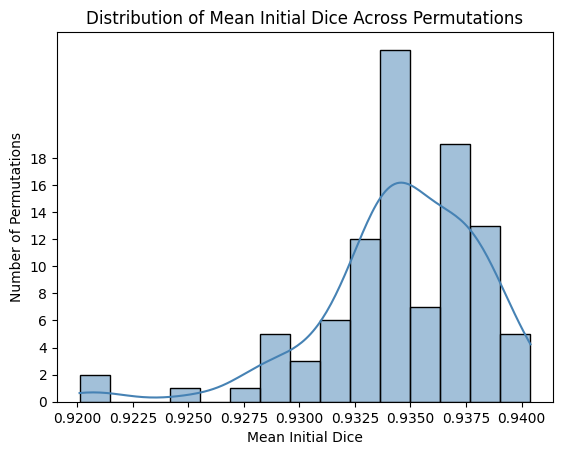

In [7]:
sb.histplot(groups["initial_dice"], bins=15, kde=True, color="steelblue")
plt.yticks(np.arange(0.0, 19.0, 2.0))
plt.title("Distribution of Mean Initial Dice Across Permutations")
plt.xlabel("Mean Initial Dice")
plt.ylabel("Number of Permutations")
plt.show()

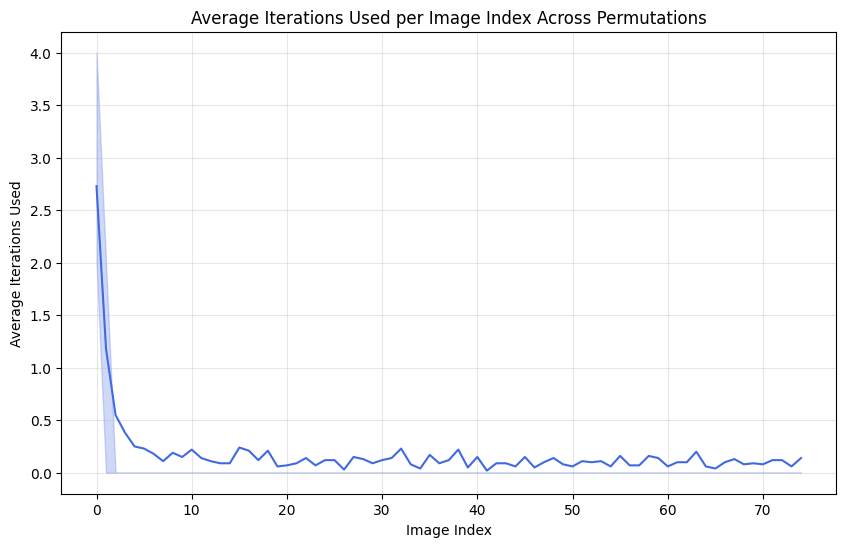

In [8]:
image_index_groups = dfA.groupby("image_index")["iterations_used"]

stats = image_index_groups.agg(
    mean_iters="mean",
    q1=lambda s: s.quantile(0.25),
    q3=lambda s: s.quantile(0.75),
    mini="min",
    maxi="max"
).reset_index() 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    stats["image_index"], 
    stats["mean_iters"], 
    color="royalblue",
    label="Average Iterations Used per Image Index Across Permutations"
)
ax.fill_between(
    stats["image_index"], 
    stats["q1"], 
    stats["q3"], 
    color="royalblue", 
    alpha=0.25, 
    label="IQR"
)
ax.set_title(f"Average Iterations Used per Image Index Across Permutations")
ax.set_xlabel("Image Index")
ax.set_ylabel("Average Iterations Used")
ax.grid(alpha=0.3)
fig.show()

## Plan C (Eval)



In [9]:
base3 = current_path / Path("A/results/eval_image_summary.csv")
dfC = pd.read_csv(base3)

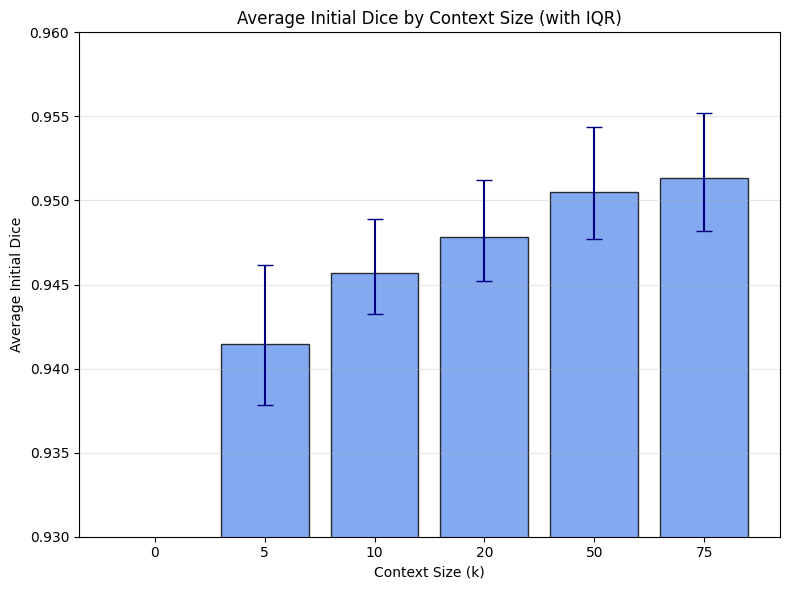

In [10]:
stats = (
     dfC.groupby(["context_size", "permutation_index"])["initial_dice"]
      .mean()
      .groupby("context_size")
      .agg(
          mean_dice="mean",
          q1=lambda s: s.quantile(0.25),
          q3=lambda s: s.quantile(0.75)
      )
      .reset_index()
)

# Compute asymmetric IQR error bars
lower = np.clip(stats["mean_dice"] - stats["q1"], a_min=0, a_max=None)
upper = np.clip(stats["q3"] - stats["mean_dice"], a_min=0, a_max=None)
yerr = np.vstack([lower, upper])

# Bar chart with IQR error bars
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(
    stats["context_size"].astype(str),   # discrete x-axis labels
    stats["mean_dice"],
    yerr=yerr,
    capsize=6,
    color="cornflowerblue",
    alpha=0.8,
    ecolor="navy",
    edgecolor="black"
)

ax.set_title("Average Initial Dice by Context Size (with IQR)")
ax.set_xlabel("Context Size (k)")
ax.set_ylabel("Average Initial Dice")
ax.set_ylim(0.93, 0.96)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

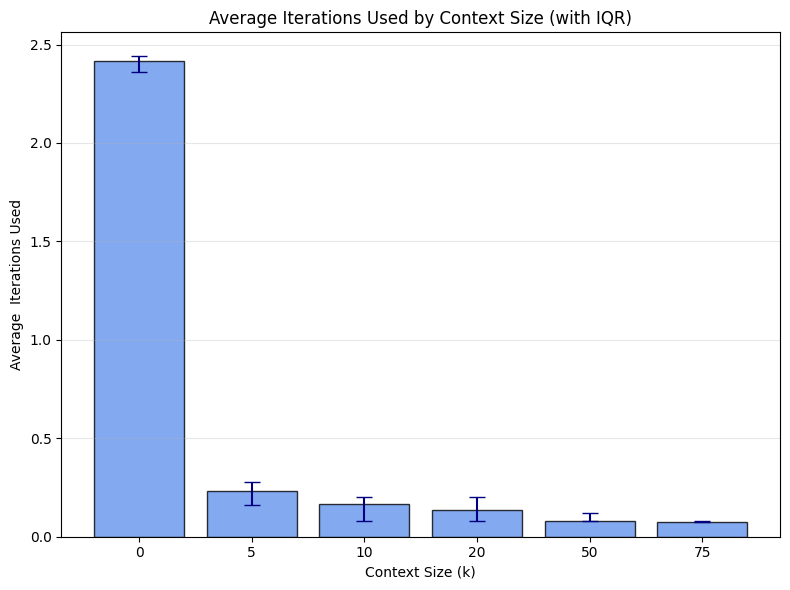

In [11]:
stats = (
     dfC.groupby(["context_size", "permutation_index"])["iterations_used"]
      .mean()
      .groupby("context_size")
      .agg(
          mean_iter="mean",
          q1=lambda s: s.quantile(0.25),
          q3=lambda s: s.quantile(0.75)
      )
      .reset_index()
)

# Compute asymmetric IQR error bars
lower = np.clip(stats["mean_iter"] - stats["q1"], a_min=0, a_max=None)
upper = np.clip(stats["q3"] - stats["mean_iter"], a_min=0, a_max=None)
yerr = np.vstack([lower, upper])

# Bar chart with IQR error bars
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(
    stats["context_size"].astype(str),   # discrete x-axis labels
    stats["mean_iter"],
    yerr=yerr,
    capsize=6,
    color="cornflowerblue",
    alpha=0.8,
    ecolor="navy",
    edgecolor="black"
)

ax.set_title("Average Iterations Used by Context Size (with IQR)")
ax.set_xlabel("Context Size (k)")
ax.set_ylabel("Average  Iterations Used")
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

## Plan B (Subset)

In [12]:
base2 = current_path / Path( "B/subset_support_images_summary.csv")
dfB = pd.read_csv(base2)

In [13]:
subset_perm_initial_dice = dfB.groupby(["subset_index", "permutation_index"])["initial_dice"].mean().reset_index()
print(subset_perm_initial_dice)
subset_stats = (
    subset_perm_initial_dice.groupby("subset_index")["initial_dice"]
      .aggregate(
          mean_dice="mean",
          std_dice="std",
          iqr=lambda s: s.quantile(0.75) - s.quantile(0.25),
          dice_range=lambda s: s.max() - s.min()
      )
      .reset_index()
)
subset_stats.to_csv(current_path / "B/subset_stats.csv")

     subset_index  permutation_index  initial_dice
0               0                  0      0.830427
1               0                  1      0.846889
2               0                  2      0.837664
3               0                  3      0.848209
4               0                  4      0.866422
..            ...                ...           ...
995             9                 95      0.853780
996             9                 96      0.836110
997             9                 97      0.851472
998             9                 98      0.817314
999             9                 99      0.845344

[1000 rows x 3 columns]


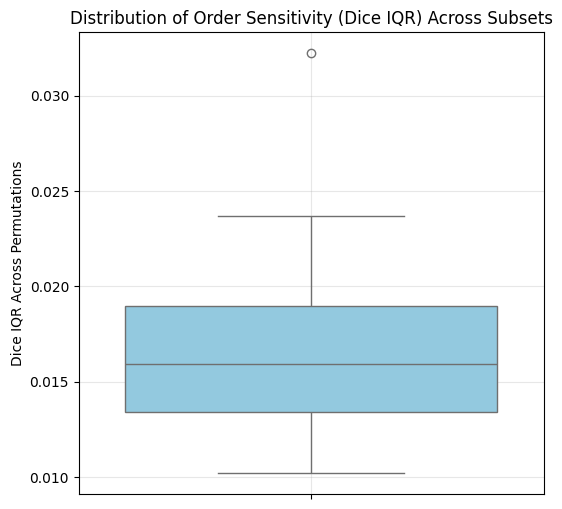

In [14]:
plt.figure(figsize=(6,6))
sb.boxplot(y=subset_stats["iqr"], color="skyblue")
plt.title("Distribution of Order Sensitivity (Dice IQR) Across Subsets")
plt.ylabel("Dice IQR Across Permutations")
plt.grid(alpha=0.3)
plt.show()

In [15]:
from scipy import stats
t_stat, p_val = stats.ttest_1samp(subset_stats["iqr"], 0)
print(f"T-statistic: {t_stat:.3f},  p-value: {p_val:.3e}")

T-statistic: 8.544,  p-value: 1.303e-05


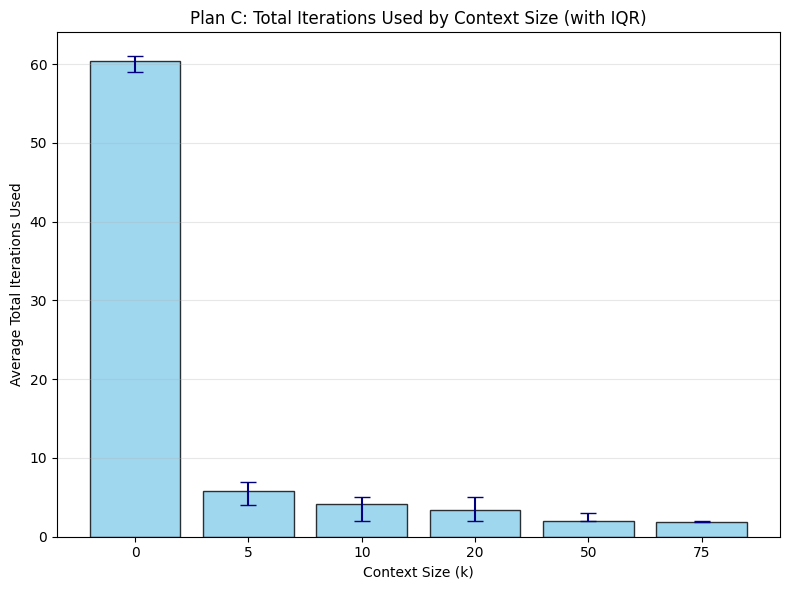

In [19]:
sum_stats = (
     dfC.groupby(["context_size", "permutation_index"])["iterations_used"]
      .sum()
      .groupby("context_size")
      .agg(
          total_iter="mean",
          q1=lambda s: s.quantile(0.25),
          q3=lambda s: s.quantile(0.75)
      )
      .reset_index()
)

lower_total = np.clip(sum_stats["total_iter"] - sum_stats["q1"], a_min=0, a_max=None)
upper_total = np.clip(sum_stats["q3"] - sum_stats["total_iter"], a_min=0, a_max=None)
total_yerr = np.vstack([lower_total, upper_total])

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(
    sum_stats["context_size"].astype(str),
    sum_stats["total_iter"],
    yerr=total_yerr,
    capsize=6,
    color="skyblue",
    alpha=0.8,
    ecolor="navy",
    edgecolor="black"
)

ax.set_title("Plan C: Total Iterations Used by Context Size (with IQR)")
ax.set_xlabel("Context Size (k)")
ax.set_ylabel("Average Total Iterations Used")
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()
